In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'autocorrelations_registered_cells_FIGURES'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [6]:
def report_stats (array1, array2, sig_func=None):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(array1, array2),"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        print sig_func(array1, array2),"d =", cohens_d

def report_stats_chance (array1, chance=0.5, sig_func=None):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [7]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.05,
            'p=%.3f'%(p*mcc) if (.05/mcc)<p<(.1/mcc) else
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [8]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    if lines==True:
        if p < thresh/mcc:
            if np.mean(array1) > np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color1, clip_on=False)
            if np.mean(array1) < np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color2, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [9]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line_chance(ax, array1, chance, x1, x2, y, color='b',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    if lines==True:
        if p < thresh/mcc:
            line = Line2D([x1, x2], [y,y], lw=1, color=color, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [38]:
sessions = 'expo', 'pre','d2', 'post','ext1','ext2','renew'
pairs = 'preVSpost','preVSd2','preVSext1','preVSext2','preVSrenew','d2VSpost','d2VSext1','d2VSext2','d2VSrenew','postVSext1','postVSext2','postVSrenew','ext1VSext2','ext1VSrenew','ext2VSrenew'

In [11]:
trad_co = ('limegreen','b','r','silver','grey','y')
pal_co = ('#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600')
dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
dark_co_b = ('forestgreen','darkcyan','rebeccapurple','firebrick','lightgrey','dimgrey','goldenrod')
alt_co = ('hotpink','mediumorchid','darkturquoise','mediumspringgreen','lawngreen','khaki')
session_labels = ('Pre','Early','Late','Ext1','Ext2','Reacq')
session_labels_b = ('Pre','Early','Day2','Late','Ext1','Ext2','Reacq')

comparisons = ['CSp','CSm']
comp_labels = ['CS+','CS-']
comp_colors = ['m','c']

In [39]:
v_name=[]
for epoch in ['base','trial']:
    for tt in ['CSm','Rew']:
        for pair in pairs:
            for pos in range(2):
                for r in 'dhpc','vhpc':
                    exec("v_name = 'decay_%s_%s_%s_%s'"%(epoch,pair,pair.split('VS')[pos],tt))
                    exec("path='../notebooks/autorestore/autocorrelations_registered_%s/'"%(r))
                    exec("decay_%s_%s_%s_%s_%s = ut.load_variable(v_name,path)"%(epoch,pair,pair.split('VS')[pos],tt,r))
                    exec("v_name = 'first15_decay_%s_%s_%s_%s'"%(epoch,pair,pair.split('VS')[pos],tt))
                    exec("path='../notebooks/autorestore/autocorrelations_registered_%s/'"%(r))
                    exec("first15_decay_%s_%s_%s_%s_%s = ut.load_variable(v_name,path)"%(epoch,pair,pair.split('VS')[pos],tt,r))
ran=False

In [41]:
##26 has a tau value of ~26. funky. deleting
if ran ==False:
    del decay_trial_preVSpost_post_Rew_dhpc['tau'][26]
    del decay_trial_preVSpost_post_Rew_dhpc['r2'][26]
ran=True

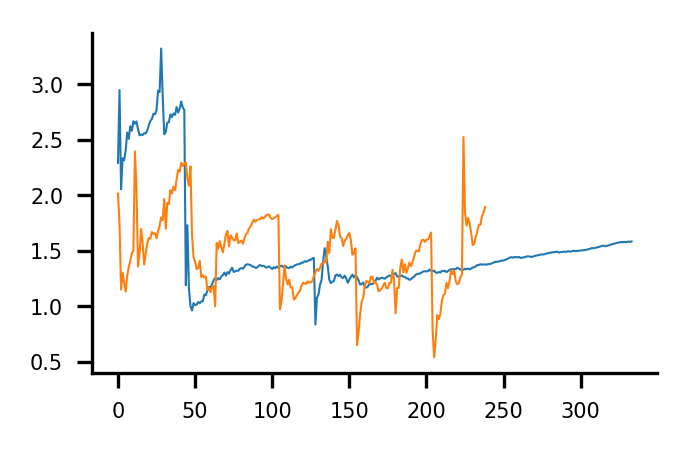

In [42]:
pl.plot(decay_trial_preVSpost_post_Rew_dhpc['tau'])
pl.plot(decay_trial_preVSpost_post_Rew_vhpc['tau'])

(array([  3.,   7.,  15.,  64.,  38.,  60.,  32.,   9.,   9.,   2.]),
 array([ 0.53938762,  0.73804244,  0.93669726,  1.13535207,  1.33400689,
         1.53266171,  1.73131653,  1.92997134,  2.12862616,  2.32728098,
         2.52593579]),
 <a list of 10 Patch objects>)

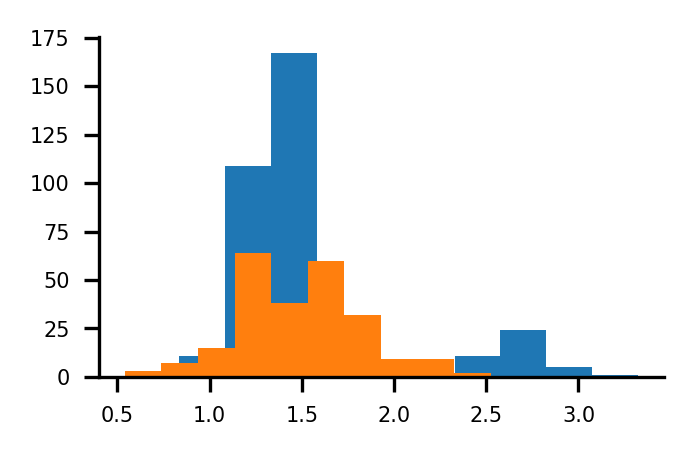

In [33]:
pl.hist(decay_trial_preVSpost_post_Rew_dhpc['tau'])
pl.hist(decay_trial_preVSpost_post_Rew_vhpc['tau'])

In [34]:
pl.hist(decay_trial_expovspost_post_Rew_dhpc['tau'])
pl.hist(decay_trial_expovspost_post_Rew_vhpc['tau'])

NameError: name 'decay_trial_expovspost_post_Rew_dhpc' is not defined

NameError: name 'decay_trial_expoVSpost_expo_Rew_vhpc' is not defined

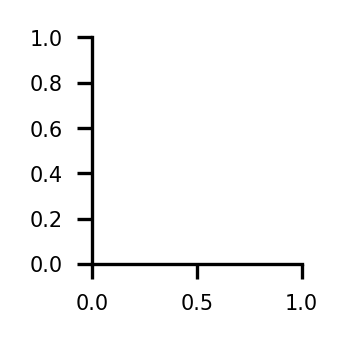

In [35]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expoVSpost_expo','expoVSpost_post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Pre','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_expo_Rew_%s['tau']"%r),eval("decay_trial_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

NameError: name 'decay_trial_expoVSpost_expo_CSm_vhpc' is not defined

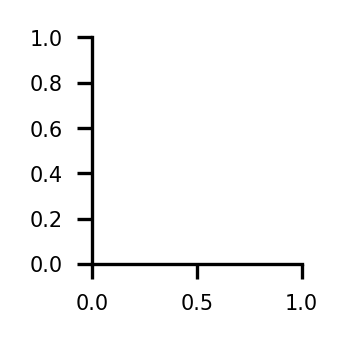

In [43]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expoVSpost_expo','expoVSpost_post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_CSm_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_CSm_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_CSm_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_CSm_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_CSm_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_CSm_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Pre','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_expo_CSm_%s['tau']"%r),eval("decay_trial_post_CSm_%s['tau']"%r),
        -.2+i,0.2+i,1.7,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

NameError: name 'decay_base_expoVSpost_expo_Rew_vhpc' is not defined

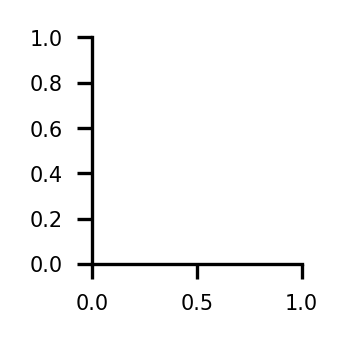

In [62]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expoVSpost_expo','expoVSpost_post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Pre','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_base_expo_Rew_%s['tau']"%r),eval("decay_base_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.75,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS, baseline period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

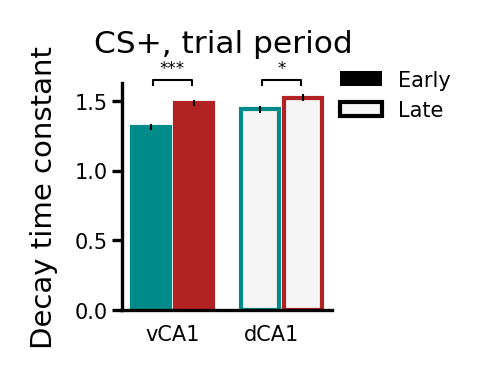

In [46]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['preVSpost_pre','preVSpost_post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_preVSpost_pre_Rew_%s['tau']"%r),eval("decay_trial_preVSpost_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

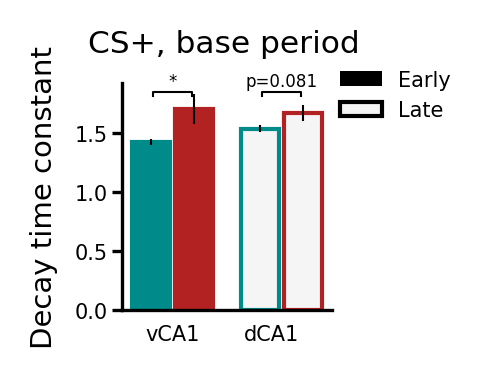

In [47]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['preVSpost_pre','preVSpost_post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_base_preVSpost_pre_Rew_%s['tau']"%r),eval("decay_base_preVSpost_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.85,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, base period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

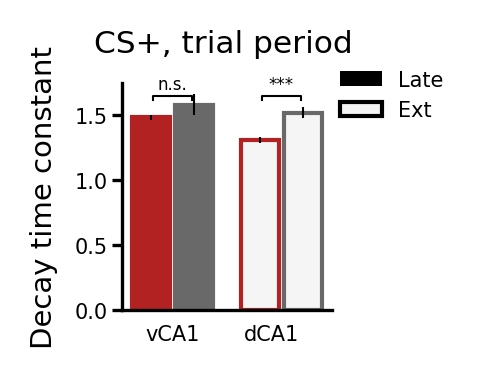

In [48]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['postVSext2_post','postVSext2_ext2'],[dark_co[2],dark_co[-2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Late','Ext'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_postVSext2_post_Rew_%s['tau']"%r),eval("decay_trial_postVSext2_ext2_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

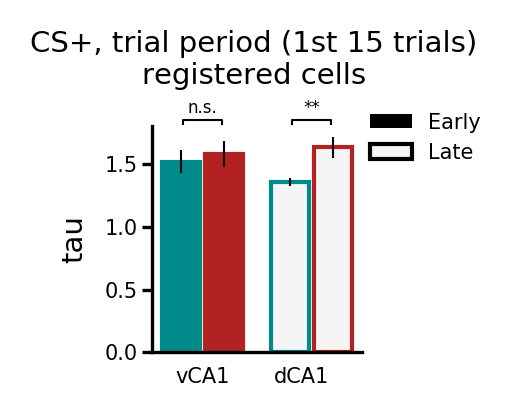

In [61]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['preVSpost_pre','preVSpost_post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('tau')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_trial_preVSpost_pre_Rew_%s['tau']"%r),eval("first15_decay_trial_preVSpost_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.85,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period (1st 15 trials)\nregistered cells',y=1.2,fontsize=7)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

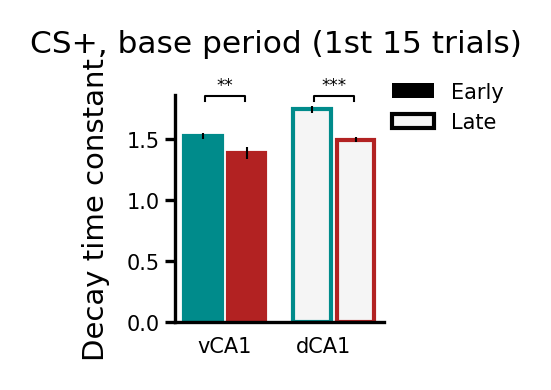

In [153]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_base_pre_Rew_%s['tau']"%r),eval("first15_decay_base_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.85,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, base period (1st 15 trials)',y=1.1,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

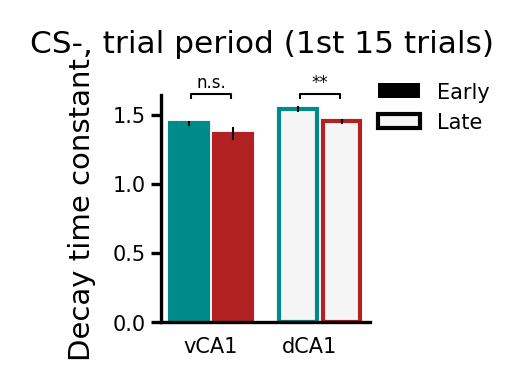

In [151]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_CSm_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_CSm_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_trial_%s_CSm_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_CSm_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_CSm_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_trial_%s_CSm_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_trial_pre_CSm_%s['tau']"%r),eval("first15_decay_trial_post_CSm_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-, trial period (1st 15 trials)',y=1.1,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

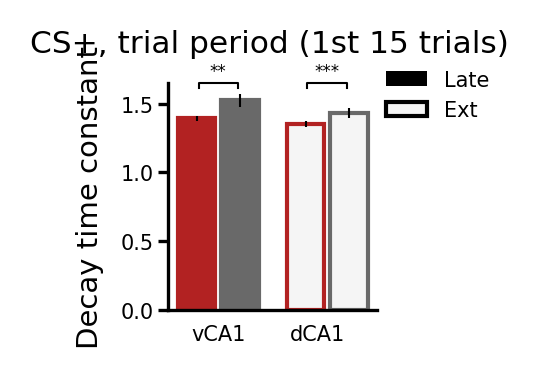

In [144]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['post','ext2'],[dark_co[2],dark_co[-2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Late','Ext'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_trial_pre_Rew_%s['tau']"%r),eval("first15_decay_trial_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period (1st 15 trials)',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

In [650]:
sessions_to_plot = ['expo','pre','post','ext2','renew']
colors_to_plot = ('forestgreen','darkcyan','firebrick','dimgrey','goldenrod')

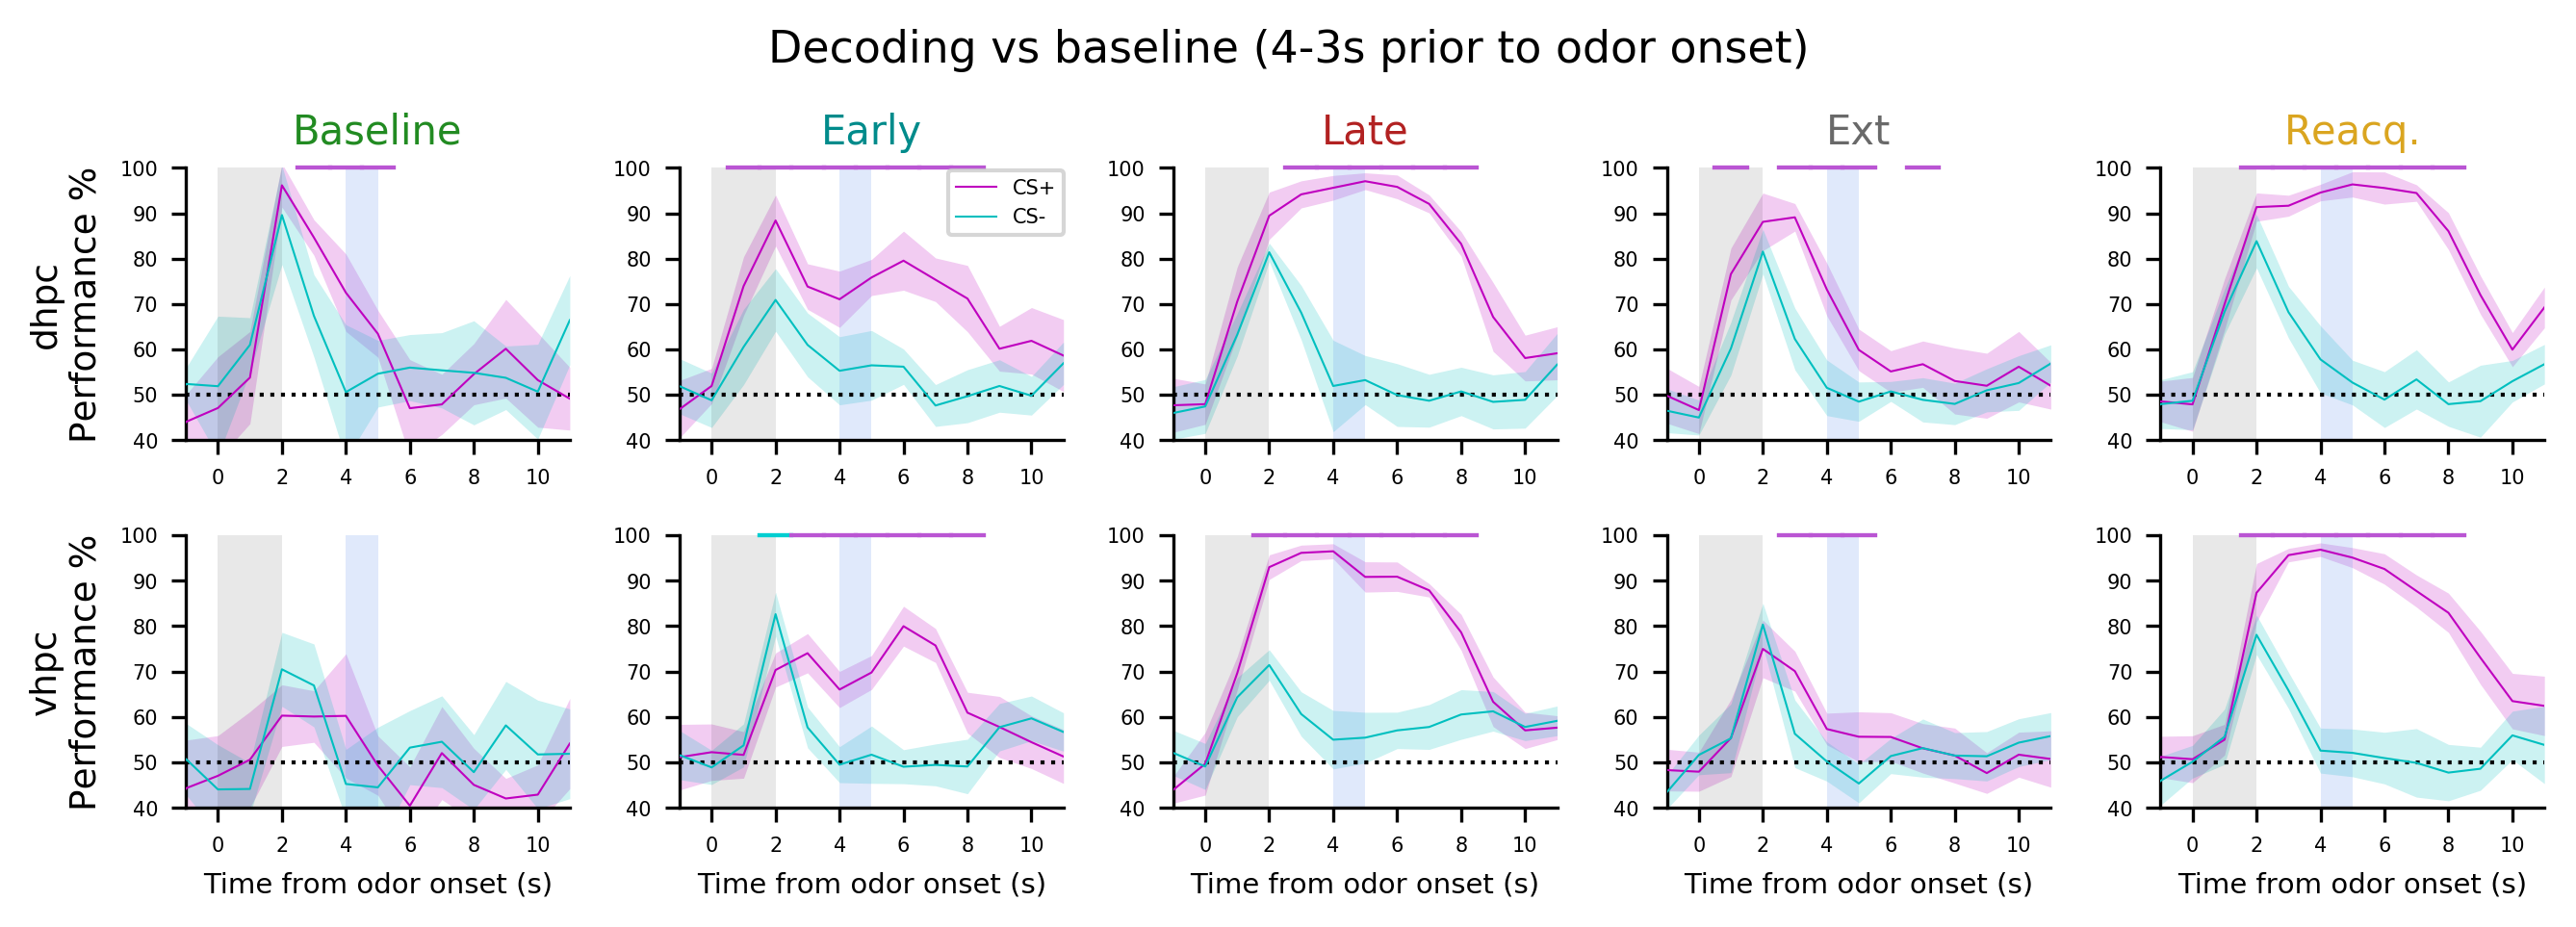

In [667]:
fig, ax = pl.subplots(2,5, figsize=(9, 3))

loops=10
for comp,c,la in zip(['CSp','CSm'],['m','c'],['CS+','CS-']):
    for y,sess in zip(range(len(sessions_to_plot)),sessions_to_plot):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x][y].plot([(t-4) for t in range(16)], [(np.mean(eval("baseline_scores_tb_%s_%s_%s[sess][:loops]"%(t,comp,reg)))*100) for t in range(16)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_%s[sess][:loops]"%(t,comp,reg)))*100) for t in range(16)])
            s = np.array([np.std(eval("baseline_scores_tb_%s_%s_%s[sess][:loops]"%(t,comp,reg)))*100 for t in range(16)])
            ax[x][y].fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
            for t in range(4,13):
                add_significance_line(ax[x][y], eval("baseline_scores_tb_%s_CSp_%s[sess][:loops]"%(t,reg)), eval("baseline_scores_tb_%s_CSm_%s[sess][:loops]"%(t,reg)),
                         t-4.5, t-3.5, 100,color1='mediumorchid',color2='darkturquoise',thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)


for x,reg in zip (range(2),['dhpc','vhpc']):
    for y in range(5):
        ax[x][y].set_ylim(40, 100)
        ax[x][y].set_xlim(-1, 11)
        ax[x][y].set_xticks(np.arange(0,11, 2))
        ax[x][y].set_xticklabels(np.arange(0,11, 2))
        ax[x][y].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[1][y].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(reg+'\nPerformance %',fontsize=9)
        pt.plot_period_bar(ax[x][y], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x][y], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
        ax[0][0].set_title('Baseline', color=dark_co_b[0],fontsize=10)
        ax[0][1].set_title('Early', color = dark_co_b[1],fontsize=10)
        ax[0][2].set_title('Late', color = dark_co_b[3],fontsize=10)
        ax[0][3].set_title('Ext', color = dark_co_b[5],fontsize=10)
        ax[0][4].set_title('Reacq.', color = dark_co_b[6],fontsize=10)
        ax[0][1].legend(bbox_to_anchor=(.7, .99), loc='upper left', borderaxespad=0.)
pl.suptitle("Decoding vs baseline (4-3s prior to odor onset)", fontsize=11, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../final-ish figures/%s_dv.pdf'%NOTEBOOK_NAME)

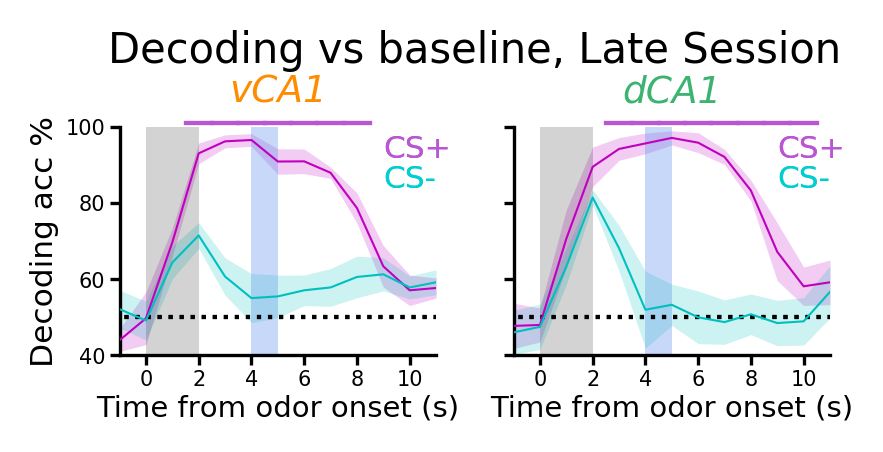

In [807]:
fig, ax = pl.subplots(1,2, figsize=(2.9, 1.3),sharey=True)

loops=10
for comp,c,la in zip(['CSp','CSm'],['m','c'],['CS+','CS-']):
    for x,reg,reg_la in zip (range(2),['vhpc','dhpc'],['vCA1','dCA1']):
        ax[x].plot([(t-4) for t in range(16)], [(np.mean(eval("baseline_scores_tb_%s_%s_%s['post'][:loops]"%(t,comp,reg)))*100) for t in range(16)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_%s['post'][:loops]"%(t,comp,reg)))*100) for t in range(16)])
        s = np.array([np.std(eval("baseline_scores_tb_%s_%s_%s['post'][:loops]"%(t,comp,reg)))*100 for t in range(16)])
        for t in range(4,16):
            add_significance_line(ax[x], eval("baseline_scores_tb_%s_CSp_%s['post'][:loops]"%(t,reg)), eval("baseline_scores_tb_%s_CSm_%s['post'][:loops]"%(t,reg)),
                     t-4.5, t-3.5, 101,color1='mediumorchid',color2='darkturquoise',thresh=.01,lines=True,stars=False,sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1)
        ax[x].fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[x].set_ylim(40, 100)
        ax[x].set_xlim(-1,11)
        ax[x].tick_params(axis='both',pad=1,length=2.5)
        ax[x].set_xticks(np.arange(0,11, 2))
        ax[x].set_xticklabels(np.arange(0,11, 2))
        ax[x].hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
        ax[x].set_xlabel('Time from odor onset (s)',labelpad=1)
        ax[0].set_ylabel('Decoding acc %',fontsize=7.5,labelpad=1.5)
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
        ax[x].text(9,92,'CS+',color='mediumorchid',fontsize=7.5)
        ax[x].text(9,84,'CS-',color='darkturquoise',fontsize=7.5)
ax[0].set_title('vCA1', color ='darkorange',fontsize=9,fontstyle='italic')
ax[1].set_title('dCA1', color ='mediumseagreen',fontsize=9,fontstyle='italic')
#ax[0].legend(bbox_to_anchor=(.7, .99), loc='upper left', borderaxespad=0.)
pl.suptitle("Decoding vs baseline, Late Session", fontsize=10, y=1.06,x=.535)

fig.tight_layout(pad=1)
fig.savefig('../final-ish figures/%s_Po_dv.pdf'%NOTEBOOK_NAME)

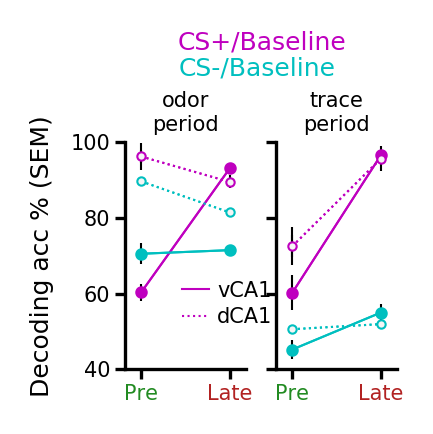

In [773]:
fig,ax = pl.subplots(1,2,figsize=(1.4,1.2),sharex=True,sharey=True)
v={}
d={}
loops=10
expectations = 'expo','post'

# Add connecting lines            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('odor','trace'),(range(2))):
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("baseline_scores_tb_%s_CSp_vhpc[ex][:loops]"%(tb)))*100 for ex in expectations],
                       color='m',label='vCA1')
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("baseline_scores_tb_%s_CSp_dhpc[ex][:loops]"%(tb)))*100 for ex in expectations],
                       color='m',label='dCA1',linestyle=":")
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("baseline_scores_tb_%s_CSm_vhpc[ex][:loops]"%(tb)))*100 for ex in expectations],
                       color='c',label='vCA1')
            ax[x].plot([p for p in (.2,1.3)],
                       [np.mean(eval("baseline_scores_tb_%s_CSm_dhpc[ex][:loops]"%(tb)))*100 for ex in expectations],
                       color='c',label='dCA1',linestyle=":")
            
for ex,c,z in zip(expectations,(('powderblue','midnightblue')),(.2,1.3)):
    for tb,tb_la,x in zip((6,8),('odor','trace'),(range(2))):
            v[ex+tb_la] = np.array(np.std(eval("baseline_scores_tb_%s_CSp_vhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("baseline_scores_tb_%s_CSp_vhpc[ex][:loops]"%(tb)))*100), 'o', color='m',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("baseline_scores_tb_%s_CSp_vhpc[ex][:loops]"%(tb)))*100),yerr=v[ex+tb_la],color='k')  
            d[ex+tb_la] = np.array(np.std(eval("baseline_scores_tb_%s_CSp_dhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("baseline_scores_tb_%s_CSp_dhpc[ex][:loops]"%(tb)))*100), 'o', 
                       color='whitesmoke',mec='m',markersize=2,mew=.5)
            ax[x].errorbar(z, (np.mean(eval("baseline_scores_tb_%s_CSp_dhpc[ex][:loops]"%(tb)))*100),yerr=d[ex+tb_la],color='k')
            
            v[ex+tb_la] = np.array(np.std(eval("baseline_scores_tb_%s_CSm_vhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("baseline_scores_tb_%s_CSm_vhpc[ex][:loops]"%(tb)))*100), 'o', color='c',markersize=2)
            ax[x].errorbar(z, (np.mean(eval("baseline_scores_tb_%s_CSm_vhpc[ex][:loops]"%(tb)))*100),yerr=v[ex+tb_la],color='k')  
            d[ex+tb_la] = np.array(np.std(eval("baseline_scores_tb_%s_CSm_dhpc[ex][:loops]"%(tb)))*100/np.sqrt(loops-1))
            ax[x].plot(z, (np.mean(eval("baseline_scores_tb_%s_CSm_dhpc[ex][:loops]"%(tb)))*100), 'o', 
                       color='whitesmoke',mec='c',markersize=2,mew=.5)
            ax[x].errorbar(z, (np.mean(eval("baseline_scores_tb_%s_CSp_dhpc[ex][:loops]"%(tb)))*100),yerr=d[ex+tb_la],color='k') 
            

            ax[x].tick_params(axis='both',pad=1,length=2.5)
            ax[0].set_ylabel('Decoding acc % (SEM)',fontsize=6)
            ax[x].set_ylim(40,100)
            #ax[x].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[x].set_title(tb_la+"\nperiod",y=.94,fontsize=5)
            ax[x].set_xlim(0,1.5)
            ax[x].set_xticks((.2,1.3))
            ax[x].set_xticklabels(['Pre','Late'])
            [t.set_color(i) for (i,t) in zip([dark_co[0],dark_co[2]],ax[x].xaxis.get_ticklabels())]
ax[0].legend(labels=['vCA1','dCA1'],frameon=False, loc=(.4,.15),labelspacing=.3,handletextpad=0.4,handlelength=1.3)
#pl.suptitle('Decoding vs Baseline',fontsize=7,x=.55,y=1.05)
ax[0].text(.65,124.5,'CS+/Baseline',fontsize=6,color='m')
ax[0].text(.67,117.5,'CS-/Baseline',fontsize=6,color='c')


fig.tight_layout(pad=1.2)

fig.savefig('../final-ish figures/%s_gmin_ExPo_dots.pdf'%NOTEBOOK_NAME)

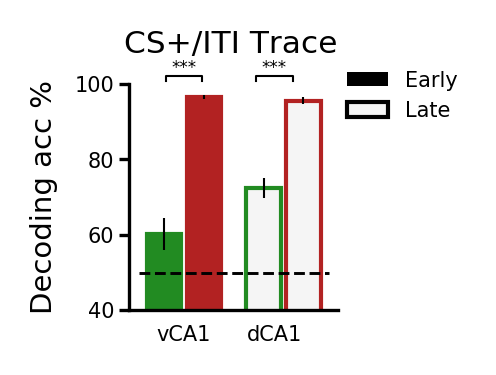

In [741]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(baseline_scores_tb_8_CSp_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(0 + i, np.mean(baseline_scores_tb_8_CSp_vhpc[sess][:loops])*100, width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(baseline_scores_tb_8_CSp_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(1.1 + i,  np.mean(baseline_scores_tb_8_CSp_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_vhpc['expo'][:loops], baseline_scores_tb_8_CSp_vhpc['post'][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/ITI Trace',y=1.06,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

In [ ]:
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],to_plot,range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(mean_scores_gmin_tb_6_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100, width, color=dark_co[c],edgecolor=dark_co[c],yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(mean_scores_gmin_tb_6_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i + 4.5,  np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')

ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,95,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,95,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,99+i*5,mcc=3))
    pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[i]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,99+i*5,mcc=3))
    
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_vhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_vhpc[sessi[3]][:loops],
        .05,2.95,108,mcc=3))
pvs.append(add_significance(ax, mean_scores_gmin_tb_6_dhpc[sessi[0]][:loops], mean_scores_gmin_tb_6_dhpc[sessi[3]][:loops],
        4.55,7.55,108,mcc=3))

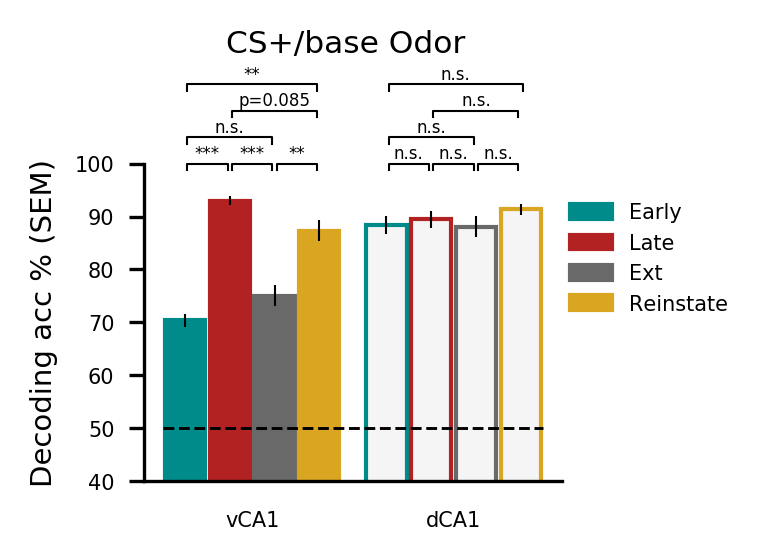

In [855]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],[dark_co[1],dark_co[2],dark_co[-2],dark_co[-1]],range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(baseline_scores_tb_6_CSp_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(baseline_scores_tb_6_CSp_vhpc[sess][:loops])*100, width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(baseline_scores_tb_6_CSp_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i+4.5, np.mean(baseline_scores_tb_6_CSp_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')

ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc[sessi[i]][:loops], baseline_scores_tb_6_CSp_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,100,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_dhpc[sessi[i]][:loops], baseline_scores_tb_6_CSp_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,100,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc[sessi[i]][:loops], baseline_scores_tb_6_CSp_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,105+i*5,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_dhpc[sessi[i]][:loops], baseline_scores_tb_6_CSp_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,105+i*5,mcc=3))   
pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc[sessi[0]][:loops], baseline_scores_tb_6_CSp_vhpc[sessi[3]][:loops],
        .05,2.95,115,mcc=3))
pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_dhpc[sessi[0]][:loops], baseline_scores_tb_6_CSp_dhpc[sessi[3]][:loops],
        4.55,7.55,115,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc['expo'][:loops], baseline_scores_tb_6_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/base Odor',y=1.2,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

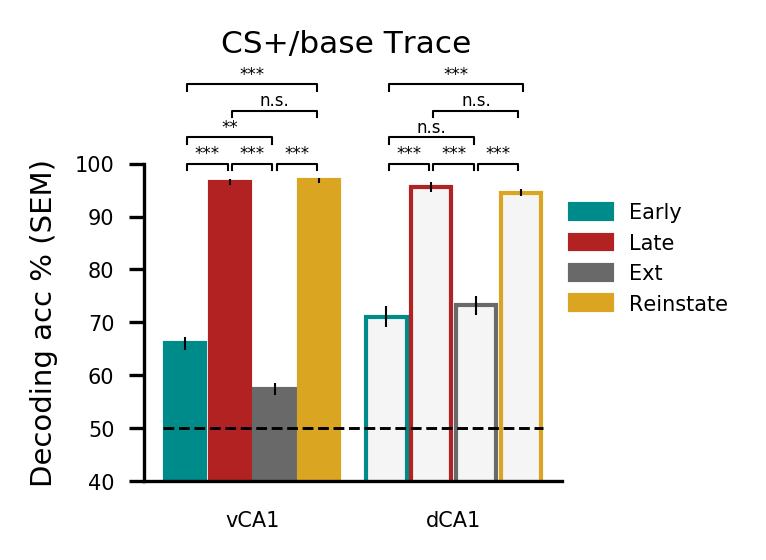

In [850]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],[dark_co[1],dark_co[2],dark_co[-2],dark_co[-1]],range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(baseline_scores_tb_8_CSp_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(baseline_scores_tb_8_CSp_vhpc[sess][:loops])*100, width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(baseline_scores_tb_8_CSp_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i+4.5, np.mean(baseline_scores_tb_8_CSp_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')

ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_vhpc[sessi[i]][:loops], baseline_scores_tb_8_CSp_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,100,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_dhpc[sessi[i]][:loops], baseline_scores_tb_8_CSp_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,100,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_vhpc[sessi[i]][:loops], baseline_scores_tb_8_CSp_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,105+i*5,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_dhpc[sessi[i]][:loops], baseline_scores_tb_8_CSp_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,105+i*5,mcc=3))   
pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_vhpc[sessi[0]][:loops], baseline_scores_tb_8_CSp_vhpc[sessi[3]][:loops],
        .05,2.95,115,mcc=3))
pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_dhpc[sessi[0]][:loops], baseline_scores_tb_8_CSp_dhpc[sessi[3]][:loops],
        4.55,7.55,115,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_vhpc['expo'][:loops], baseline_scores_tb_8_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/base Trace',y=1.2,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

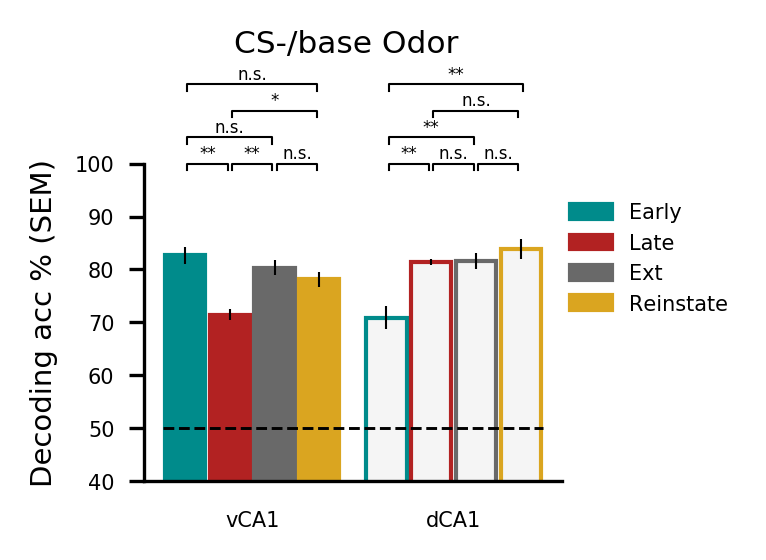

In [856]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],[dark_co[1],dark_co[2],dark_co[-2],dark_co[-1]],range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(baseline_scores_tb_6_CSm_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(baseline_scores_tb_6_CSm_vhpc[sess][:loops])*100, width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(baseline_scores_tb_6_CSm_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i+4.5, np.mean(baseline_scores_tb_6_CSm_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')

ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_vhpc[sessi[i]][:loops], baseline_scores_tb_6_CSm_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,100,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_dhpc[sessi[i]][:loops], baseline_scores_tb_6_CSm_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,100,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_vhpc[sessi[i]][:loops], baseline_scores_tb_6_CSm_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,105+i*5,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_dhpc[sessi[i]][:loops], baseline_scores_tb_6_CSm_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,105+i*5,mcc=3))   
pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_vhpc[sessi[0]][:loops], baseline_scores_tb_6_CSm_vhpc[sessi[3]][:loops],
        .05,2.95,115,mcc=3))
pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_dhpc[sessi[0]][:loops], baseline_scores_tb_6_CSm_dhpc[sessi[3]][:loops],
        4.55,7.55,115,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSm_vhpc['expo'][:loops], baseline_scores_tb_6_CSm_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-/base Odor',y=1.2,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSm.pdf'%NOTEBOOK_NAME)

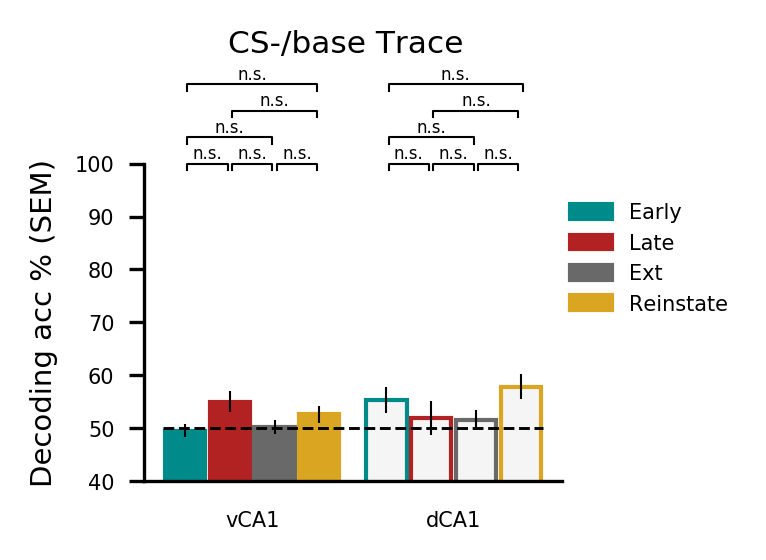

In [857]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['pre','post','ext2','renew'],[dark_co[1],dark_co[2],dark_co[-2],dark_co[-1]],range(4),['Early','Late','Ext','Reinstate']):
    v[sess] = np.array(np.std(baseline_scores_tb_8_CSm_vhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i, np.mean(baseline_scores_tb_8_CSm_vhpc[sess][:loops])*100, width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(baseline_scores_tb_8_CSm_dhpc[sess][:loops])/np.sqrt(loops)*100)
    ax.bar(i+4.5, np.mean(baseline_scores_tb_8_CSm_dhpc[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,8, color='k', lw=.7, linestyles='dashed')

ax.set_ylabel('Decoding acc % (SEM)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['pre','post','ext2','renew']
for i in range(3):
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_vhpc[sessi[i]][:loops], baseline_scores_tb_8_CSm_vhpc[sessi[i+1]][:loops],
        i+.05,i+.95,100,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_dhpc[sessi[i]][:loops], baseline_scores_tb_8_CSm_dhpc[sessi[i+1]][:loops],
        i+4.55,i+5.45,100,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_vhpc[sessi[i]][:loops], baseline_scores_tb_8_CSm_vhpc[sessi[i+2]][:loops],
        i+.05,i+1.95,105+i*5,mcc=3))
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_dhpc[sessi[i]][:loops], baseline_scores_tb_8_CSm_dhpc[sessi[i+2]][:loops],
        i+4.55,i+6.45,105+i*5,mcc=3))   
pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_vhpc[sessi[0]][:loops], baseline_scores_tb_8_CSm_vhpc[sessi[3]][:loops],
        .05,2.95,115,mcc=3))
pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_dhpc[sessi[0]][:loops], baseline_scores_tb_8_CSm_dhpc[sessi[3]][:loops],
        4.55,7.55,115,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_8_CSm_vhpc['expo'][:loops], baseline_scores_tb_8_CSm_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-/base Trace',y=1.2,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_PrPoExRe_CSm.pdf'%NOTEBOOK_NAME)

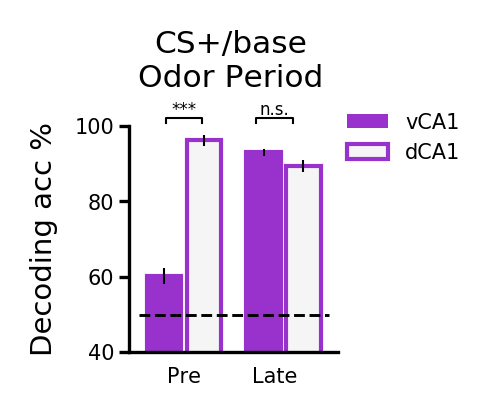

In [806]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for reg,c,i in zip(['vhpc','dhpc'],['darkorchid','whitesmoke'],[-width/2-.03,+width/2+.03]):
    v[reg] = np.array(np.std(eval("baseline_scores_tb_6_CSp_%s['expo']"%(reg))[:loops])/np.sqrt(loops)*100)
    ax.bar(0+i, np.mean(eval("baseline_scores_tb_6_CSp_%s['expo']"%(reg))[:loops])*100, width, color=c,edgecolor='darkorchid',yerr=v[reg])
    d[reg] = np.array(np.std(eval("baseline_scores_tb_6_CSp_%s['post']"%(reg))[:loops])/np.sqrt(loops)*100)
    ax.bar(1.1+i,  np.mean(eval("baseline_scores_tb_6_CSp_%s['post']"%(reg))[:loops])*100, width,color=c, edgecolor='darkorchid',yerr=d[reg])
ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='darkorchid'),Patch(facecolor='whitesmoke',edgecolor='darkorchid')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc[sess][:loops], baseline_scores_tb_6_CSp_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/base\nOdor Period',y=1.2,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_CSp_b.pdf'%NOTEBOOK_NAME)

expo MannwhitneyuResult(statistic=0.0, pvalue=0.00017070029451986127) r = -0.845154254729
None
post MannwhitneyuResult(statistic=69.5, pvalue=0.15015834850815576) r = 0.329610159344
None


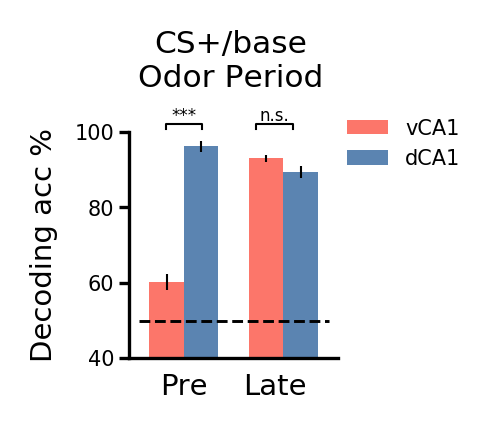

In [880]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for reg,c,i in zip(['vhpc','dhpc'],['#FC766AFF','#5B84B1FF'],[-width/2,+width/2]):
    v[reg] = np.array(np.std(eval("baseline_scores_tb_6_CSp_%s['expo']"%(reg))[:loops])/np.sqrt(loops)*100)
    ax.bar(0+i, np.mean(eval("baseline_scores_tb_6_CSp_%s['expo']"%(reg))[:loops])*100, width, color=c,yerr=v[reg])
    d[reg] = np.array(np.std(eval("baseline_scores_tb_6_CSp_%s['post']"%(reg))[:loops])/np.sqrt(loops)*100)
    ax.bar(1.1+i,  np.mean(eval("baseline_scores_tb_6_CSp_%s['post']"%(reg))[:loops])*100, width,color=c, yerr=d[reg])
ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#FC766AFF'),Patch(facecolor='#5B84B1FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc[sess][:loops], baseline_scores_tb_6_CSp_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
    print sess,report_stats(baseline_scores_tb_6_CSp_vhpc[sess][:loops], baseline_scores_tb_6_CSp_dhpc[sess][:loops])
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/base\nOdor Period',y=1.22,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_odor_ExPo_CSp_b.pdf'%NOTEBOOK_NAME)

expo MannwhitneyuResult(statistic=25.5, pvalue=0.069432506880265366) r = -0.414125584817
None
post MannwhitneyuResult(statistic=56.0, pvalue=0.6751557435978317) r = 0.101418510567
None


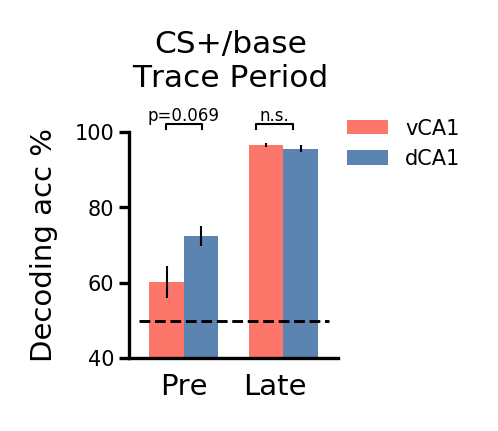

In [881]:
from matplotlib.patches import Patch
labels = ['Pre','Late']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for reg,c,i in zip(['vhpc','dhpc'],['#FC766AFF','#5B84B1FF'],[-width/2,+width/2]):
    v[reg] = np.array(np.std(eval("baseline_scores_tb_8_CSp_%s['expo']"%(reg))[:loops])/np.sqrt(loops)*100)
    ax.bar(0+i, np.mean(eval("baseline_scores_tb_8_CSp_%s['expo']"%(reg))[:loops])*100, width, color=c,yerr=v[reg])
    d[reg] = np.array(np.std(eval("baseline_scores_tb_8_CSp_%s['post']"%(reg))[:loops])/np.sqrt(loops)*100)
    ax.bar(1.1+i,  np.mean(eval("baseline_scores_tb_8_CSp_%s['post']"%(reg))[:loops])*100, width,color=c,yerr=d[reg])
ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc %')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.legend([Patch(facecolor='#FC766AFF'),Patch(facecolor='#5B84B1FF')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(['expo','post'], range(2)):
    pvs.append(add_significance(ax, baseline_scores_tb_8_CSp_vhpc[sess][:loops], baseline_scores_tb_8_CSp_dhpc[sess][:loops],
        -.2+i,0.2+i,102))
    print sess,report_stats(baseline_scores_tb_8_CSp_vhpc[sess][:loops], baseline_scores_tb_8_CSp_dhpc[sess][:loops])
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+/base\nTrace Period',y=1.22,fontsize=7.5)

fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp_b.pdf'%NOTEBOOK_NAME)

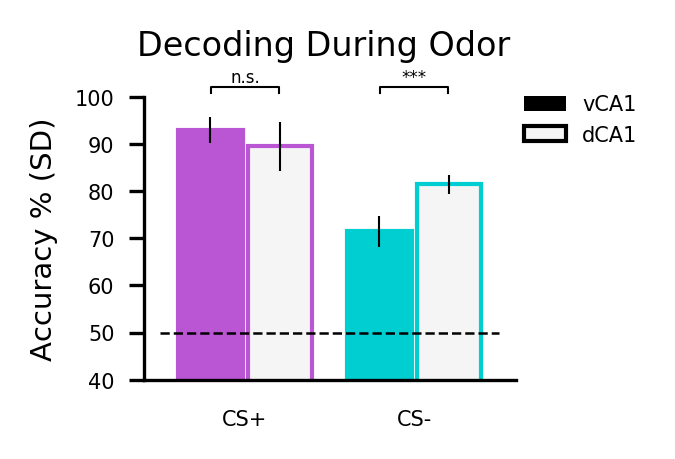

In [671]:
from matplotlib.patches import Patch
labels = ['CS+','CS-']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,1]
fig, ax = pl.subplots(figsize=(1.6,1.25))
v[sess] = np.array(np.std(baseline_scores_tb_6_CSp_vhpc['post'][:loops])*100)
ax.bar(-width/2-.015, np.mean(baseline_scores_tb_6_CSp_vhpc['post'][:loops])*100, width, edgecolor='mediumorchid',color='mediumorchid',yerr=v[sess])
d[sess] = np.array(np.std(baseline_scores_tb_6_CSp_dhpc['post'][:loops])*100)
ax.bar(width/2+.015,  np.mean(baseline_scores_tb_6_CSp_dhpc['post'][:loops])*100, width,edgecolor='mediumorchid',color='whitesmoke',yerr=d[sess])
v[sess] = np.array(np.std(baseline_scores_tb_6_CSm_vhpc['post'][:loops])*100)
ax.bar(1 - width/2-.015, np.mean(baseline_scores_tb_6_CSm_vhpc['post'][:loops])*100, width, edgecolor='darkturquoise',color='darkturquoise',yerr=v[sess])
d[sess] = np.array(np.std(baseline_scores_tb_6_CSm_dhpc['post'][:loops])*100)
ax.bar(1 + width/2+.015,  np.mean(baseline_scores_tb_6_CSm_dhpc['post'][:loops])*100, width,edgecolor='darkturquoise',color='whitesmoke',yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.6, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for comp,i in zip(['CSp','CSm'], range(2)):
    pvs.append(add_significance(ax,eval("baseline_scores_tb_6_%s_vhpc['post'][:loops]"%comp), eval("baseline_scores_tb_6_%s_dhpc['post'][:loops]"%comp),
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Odor',y=1.06,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_odor_Po.pdf'%NOTEBOOK_NAME)

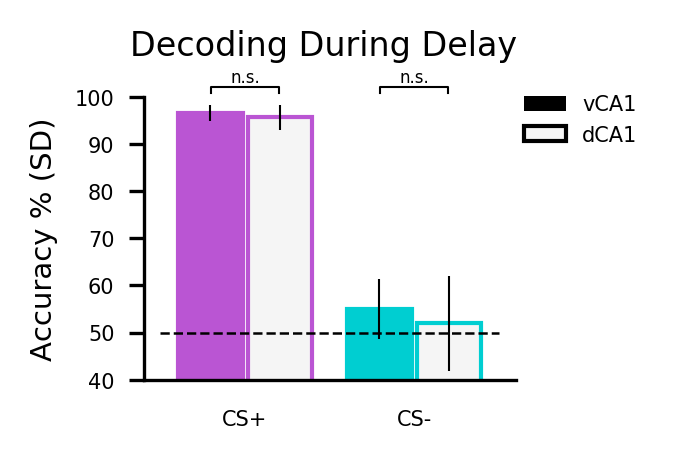

In [672]:
from matplotlib.patches import Patch
labels = ['CS+','CS-']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,1]
fig, ax = pl.subplots(figsize=(1.6,1.25))
v[sess] = np.array(np.std(baseline_scores_tb_8_CSp_vhpc['post'][:loops])*100)
ax.bar(-width/2-.015, np.mean(baseline_scores_tb_8_CSp_vhpc['post'][:loops])*100, width, edgecolor='mediumorchid',color='mediumorchid',yerr=v[sess])
d[sess] = np.array(np.std(baseline_scores_tb_8_CSp_dhpc['post'][:loops])*100)
ax.bar(width/2+.015,  np.mean(baseline_scores_tb_8_CSp_dhpc['post'][:loops])*100, width,edgecolor='mediumorchid',color='whitesmoke',yerr=d[sess])
v[sess] = np.array(np.std(baseline_scores_tb_8_CSm_vhpc['post'][:loops])*100)
ax.bar(1 - width/2-.015, np.mean(baseline_scores_tb_8_CSm_vhpc['post'][:loops])*100, width, edgecolor='darkturquoise',color='darkturquoise',yerr=v[sess])
d[sess] = np.array(np.std(baseline_scores_tb_8_CSm_dhpc['post'][:loops])*100)
ax.bar(1 + width/2+.015,  np.mean(baseline_scores_tb_8_CSm_dhpc['post'][:loops])*100, width,edgecolor='darkturquoise',color='whitesmoke',yerr=d[sess])
ax.hlines(50,-.5,1.5, color='k', lw=.6, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for comp,i in zip(['CSp','CSm'], range(2)):
    pvs.append(add_significance(ax,eval("baseline_scores_tb_8_%s_vhpc['post'][:loops]"%comp), eval("baseline_scores_tb_8_%s_dhpc['post'][:loops]"%comp),
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During Delay',y=1.06,fontsize=8)

fig.savefig('../final-ish figures/%s_bars_tr_Po.pdf'%NOTEBOOK_NAME)

In [696]:
save_workspace(db)

Could not store variable 'matplotlib'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
